<a href="https://colab.research.google.com/github/vikaschaudhary53/cardiovascular-risk-prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Classification - Vikas Chaudhary/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

#Data Preperation

In [5]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [7]:
df.shape

(3390, 17)

In [8]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

dropping 'education' column

In [11]:
#dropping 'education' column
df.drop(columns='education', inplace = True)

In [12]:
# Dealing with 'null'/'nan' values in 'BPMeds' column
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [13]:
print(df[df['BPMeds'] == 1.0]['sysBP'].mean())
print(df[df['BPMeds'] == 1.0]['diaBP'].mean())

165.89
96.59


In [14]:
print("{:.2f}".format(df[df['BPMeds'] == 0.0]['sysBP'].mean()))
print("{:.2f}".format(df[df['BPMeds'] == 0.0]['diaBP'].mean()))

131.47
82.44


Dealing with null/nan values in 'BPmeds' columns
1. The systolic pressure above 140 mm Hg is considered as high and above 180 mm Hg is considered as dangerous.
2. The diastolic pressure above 90 mm Hg is considered as high and above 120 mm Hg is considered as dangerous.

So, it is necessary to take medicine above the dangerous limit. But only 100 out of 3346 or 1 out of 33.46 are on medication.

In [15]:
#Filling 'null'/'nan' values in 'BPMeds' column the person with max 'sysBP and max 'diaBP' will be considered on medication while other on no medication
print(df[df['BPMeds'].isna()]['sysBP'].max())
print(df[df['BPMeds'].isna()]['diaBP'].max())

208.0
136.0


In [16]:
df[(df['BPMeds'].isna()) & (df['diaBP'] == 136.0)]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
923,923,52,F,NO,0.0,NaN,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0


All other missing except the person with 'id' = 923 can be put in no medication.

In [17]:
#First filling 'NaN' with '0' later 'id'=923 with 0
df['BPMeds'].fillna(df['BPMeds'].median(), inplace = True)

In [18]:
df[(df['sysBP']==208.0) & (df['diaBP'] == 136.0)]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
923,923,52,F,NO,0.0,0.0,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0


Replacing the above 0.0 with 1.0 in 'BPMeds'.

In [19]:
df.loc[df['id']==923, 'BPMeds'] = 1.0

In [20]:
df[(df['sysBP']==208.0) & (df['diaBP'] == 136.0)]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
923,923,52,F,NO,0.0,1.0,0,1,0,252.0,208.0,136.0,25.79,92.0,82.0,0


In [21]:
df.isnull().sum()

id                   0
age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Dealing with 'NaN' values in 'cigsPerDay'

In [22]:
df[df['cigsPerDay'].isna()]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,422,55,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,466,45,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,469,42,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,491,61,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,538,41,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,767,54,M,YES,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,1461,47,F,YES,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,1467,49,F,YES,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,1597,57,F,YES,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,1986,49,F,YES,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


Since all the candidate who are smokers we cann't fill the 'NaN' with 0 we need to give some number

In [23]:
int(df[(df['cigsPerDay']!='NaN') & (df['cigsPerDay']!=0.0)]['cigsPerDay'].mean())

18

18 cigarettes/day is the mean (average) for a smoker so we will fill the NaN values with 18

In [24]:
#Filling the 'NaN' value in 'cigsPerDay'
df['cigsPerDay'].fillna(int(df[(df['cigsPerDay']!='NaN') & (df['cigsPerDay']!=0.0)]['cigsPerDay'].mean()), inplace=True)

In [25]:
df[df['cigsPerDay'].isna()]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


Dealing with 'NaN' Vaues in 'totChol' columns

In [26]:
df[df['totChol'].isna()]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
10,10,61,F,NO,0.0,0.0,0,1,0,NaN,185.0,121.0,35.22,80.0,NaN,0
69,69,65,M,NO,0.0,0.0,0,0,0,NaN,152.5,97.5,28.35,65.0,73.0,0
254,254,52,F,NO,0.0,0.0,0,0,0,NaN,129.0,83.0,32.57,65.0,NaN,0
290,290,37,F,YES,30.0,0.0,0,0,0,NaN,115.0,79.0,28.41,85.0,NaN,0
554,554,38,F,YES,3.0,1.0,0,1,0,NaN,125.0,80.0,22.79,98.0,NaN,0
625,625,62,F,YES,30.0,0.0,0,0,0,NaN,153.0,60.0,27.47,60.0,NaN,0
700,700,44,F,YES,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
732,732,61,F,NO,0.0,0.0,0,0,0,NaN,115.0,60.0,25.50,76.0,99.0,0
797,797,58,M,NO,0.0,0.0,0,0,0,NaN,116.5,71.0,27.04,70.0,86.0,0
808,808,47,F,YES,20.0,0.0,0,0,0,NaN,121.0,70.0,23.09,80.0,83.0,0


Cholesterol and Stroke are related. So, let's explore the cholesterol level of candidates with 'prevalentStroke' = 1 and 'prevalentStroke' = 0

In [27]:
print('Highest Cholesterol level among the persons with Prevalent Stroke:',df[df['prevalentStroke']==1]['totChol'].max())
print('Lowest Cholesterol level among the persons with Prevalent Stroke:',df[df['prevalentStroke']==1]['totChol'].min())

Highest Cholesterol level among the persons with Prevalent Stroke: 321.0
Lowest Cholesterol level among the persons with Prevalent Stroke: 107.0


Since, the person with the highest cholestrol level i.e. 696 did not has prevalent stroke and with lowest cholestrol level i.e. 107 has prevalent stroke. So, we will replace the 'NaN' values in 'totChol' with median

In [28]:
#Filling the 'NaN' value in 'totChol'
df['totChol'].fillna(df['totChol'].median(), inplace = True)

In [29]:
df.isnull().sum()

id                   0
age                  0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [30]:
#Filling the 'NaN' values in 'BMI' and 'heartRate'
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['heartRate'].fillna(df['heartRate'].median(), inplace = True)

In [31]:
df.isnull().sum()

id                   0
age                  0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            304
TenYearCHD           0
dtype: int64

Now, only 'glucose' has 'NaN' values

Let's explore the 'glucose' column and find the ways to fill the 'NaN' values

In [32]:
df[df['glucose'].isna()]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
9,9,55,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0
10,10,61,F,NO,0.0,0.0,0,1,0,234.0,185.0,121.0,35.22,80.0,NaN,0
36,36,46,F,NO,0.0,0.0,0,0,0,193.0,106.5,70.5,26.18,75.0,NaN,0
38,38,41,F,YES,9.0,1.0,1,1,0,180.0,114.0,70.0,22.41,92.0,NaN,0
55,55,51,F,NO,0.0,0.0,0,1,0,351.0,134.0,97.5,21.66,100.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,3289,40,M,YES,10.0,0.0,0,0,0,195.0,110.0,70.0,24.75,79.0,NaN,0
3290,3290,67,F,NO,0.0,0.0,0,1,0,234.0,173.0,100.0,33.60,60.0,NaN,0
3349,3349,46,F,NO,0.0,0.0,0,0,0,242.0,129.0,85.0,27.40,80.0,NaN,1
3370,3370,46,F,YES,30.0,0.0,0,0,0,219.0,107.0,69.0,21.40,66.0,NaN,0


We know that blood glucose is directly related to diabetes and we will try to get some relation between 'diabetes' column and 'glucose' column

In [33]:
df[(df['glucose'].isna()) & (df['diabetes'])==1]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
798,798,47,M,NO,0.0,0.0,0,0,1,199.0,161.0,102.0,29.17,58.0,NaN,0
1138,1138,50,F,YES,9.0,0.0,0,0,1,210.0,134.0,80.0,18.26,64.0,NaN,0
1875,1875,47,F,YES,25.0,0.0,0,1,1,258.0,195.0,90.0,25.38,86.0,NaN,1


only the above 3 candidates with 'NaN' glucose have diabetes

In [34]:
df[df['diabetes']==1]

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
77,77,63,F,NO,0.0,0.0,0,1,1,150.0,152.0,88.0,36.54,72.0,170.0,0
107,107,45,M,NO,0.0,0.0,0,0,1,189.0,132.0,78.0,28.40,75.0,177.0,0
130,130,63,M,NO,0.0,0.0,0,0,1,229.0,109.0,75.0,38.42,110.0,120.0,0
134,134,64,F,NO,0.0,0.0,0,1,1,262.0,147.0,90.0,26.51,85.0,173.0,0
173,173,58,F,NO,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,3164,43,M,YES,20.0,0.0,0,0,1,309.0,124.0,85.0,26.91,70.0,215.0,0
3212,3212,60,F,NO,0.0,0.0,0,1,1,282.0,213.0,94.5,28.58,71.0,78.0,0
3232,3232,50,F,NO,0.0,0.0,0,1,1,260.0,190.0,130.0,43.67,85.0,260.0,0
3260,3260,43,F,NO,0.0,0.0,0,1,1,231.0,155.5,99.5,34.95,68.0,274.0,1


The 'NaN' values in 'glucose' will be replace in two ways where candidates with diabetes will get higher glucose level while non-diabetic will get lower glucose level.

In [35]:
dia_list = list(df[(df['glucose'].isna()) & (df['diabetes'])==1]['id'])

First filling all 'Nan' values with median and later with higher glucose level for the above 'dia_list' candidates.

In [36]:
df['glucose'].fillna(df['glucose'].median(), inplace = True)

In [37]:
#Again replacing the value of the 3 candidates
for i in dia_list:
  df.loc[df['id']== i, 'glucose'] = df[df['diabetes']==1]['glucose'].median()

In [38]:
df.isnull().sum()

id                 0
age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [39]:
df.isna().sum()

id                 0
age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [40]:
df.describe()

,id,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,1694.500000,49.542183,9.127434,0.029794,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.782006,0.150737
std,978.753033,8.592878,11.862159,0.170042,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.244717,0.357846
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,1694.500000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,3389.000000,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [41]:
df.columns

Index(['id', 'age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Dropping 'id' column

In [45]:
df.drop(columns='id', inplace=True)

In [46]:
df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,M,NO,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [47]:
#dividing columns into 'numerical' or 'categorical' datatype
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
categorical_columns = ['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

[]

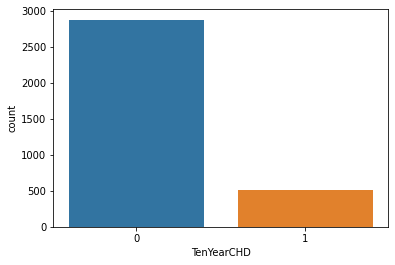

In [48]:
sns.countplot(x=df['TenYearCHD'])
plt.plot()

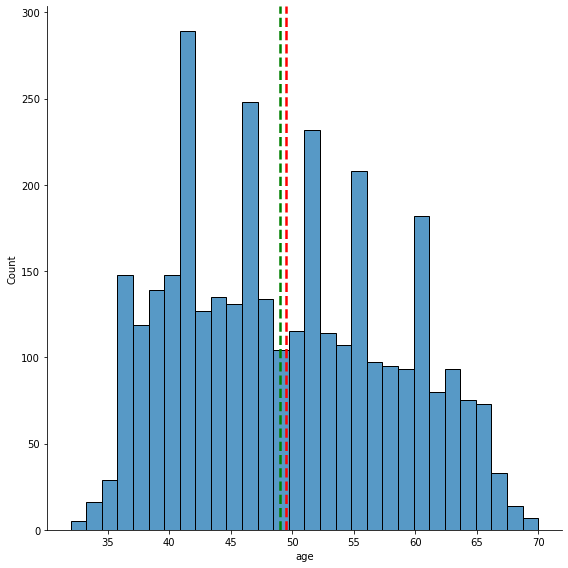

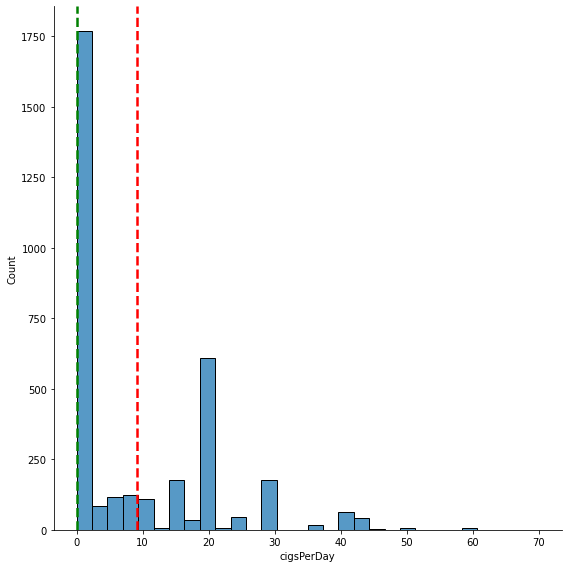

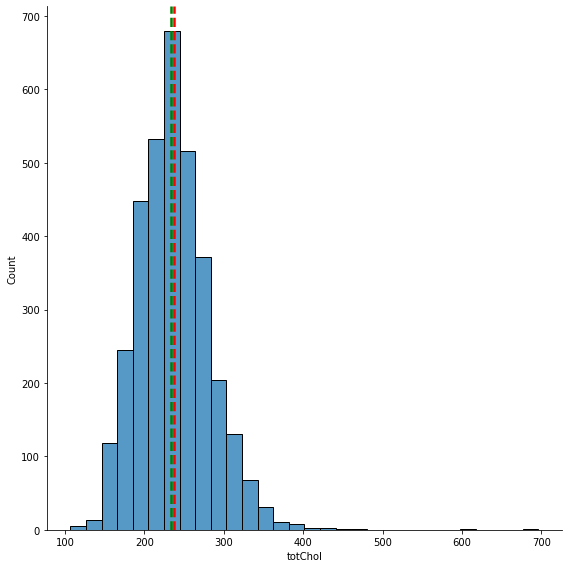

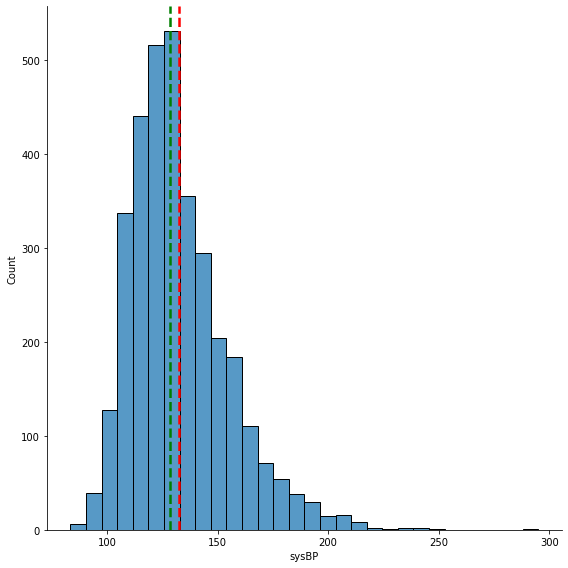

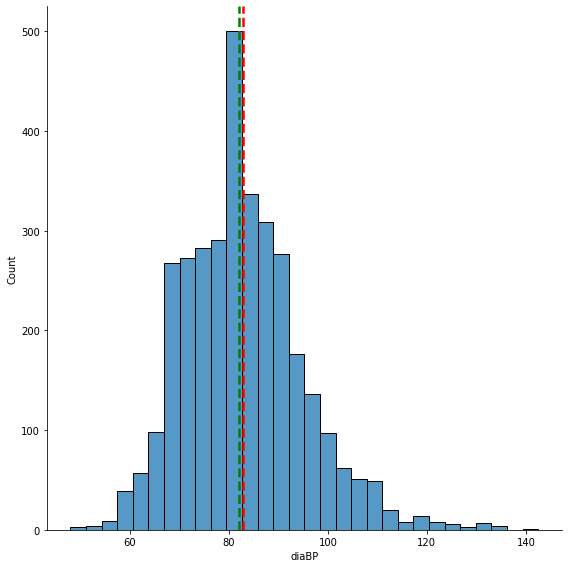

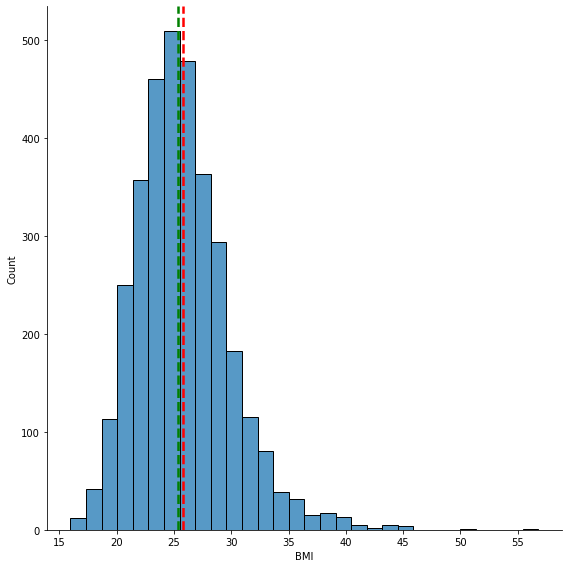

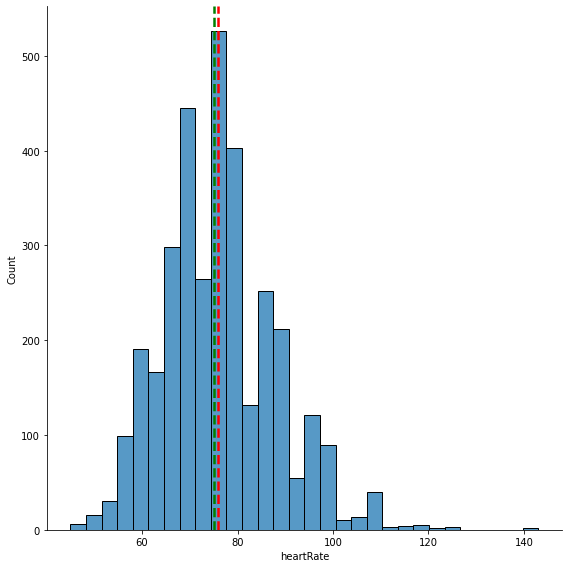

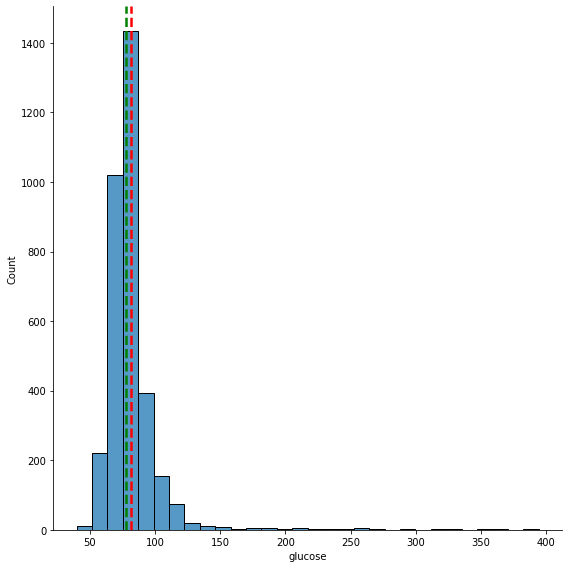

In [49]:
for i in numerical_columns:
  sns.displot(data=df, x = i, bins=30, height=8)
  plt.axvline(x=df[i].mean(), color='red', ls='--', lw=2.5)
  plt.axvline(x=df[i].median(), color='green',ls='--', lw=2.5)

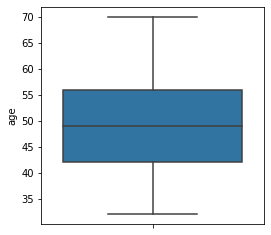

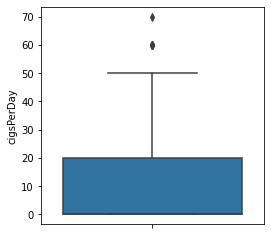

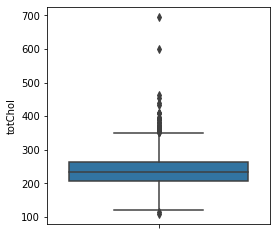

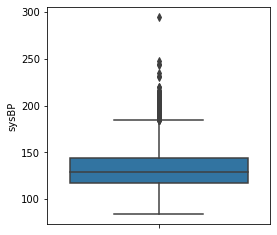

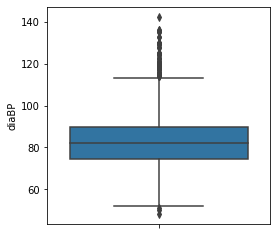

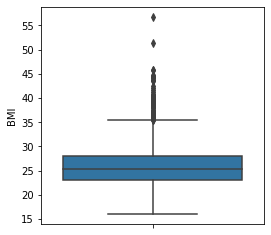

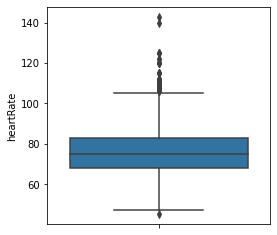

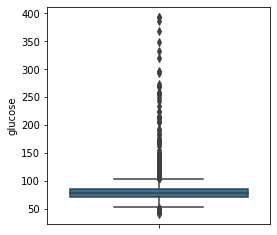

In [50]:
#outliar detection
for col in numerical_columns:
  plt.figure(figsize=(4,4))
  fig=sns.boxplot(y=df[col])
  fig.set_title('')
  fig.set_ylabel(col)
  plt.show()

####Let's us find out if the number which are represented as 'outliars' are actually outliars or not.

In [51]:
#maximum values in 'cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
for i in numerical_columns[1:]:
  print('Max',i,'-',df[i].max())

Max cigsPerDay - 70.0
Max totChol - 696.0
Max sysBP - 295.0
Max diaBP - 142.5
Max BMI - 56.8
Max heartRate - 143.0
Max glucose - 394.0


###Smoking 70 cigarettes per day/person is rare by it is still possible number.

###"*Extremely high triglyceride levels (more than 1000 mg/dL) can lead to abdominal pain and a life-threatening disorder of the pancreas called pancreatitis*" -- Texasheart.org

###So, 686 mg/dL is not an outliar

In [52]:
df[df['totChol']== 696]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
512,51,M,YES,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


In [53]:
df[df['sysBP']== 295]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1941,64,F,NO,0.0,0.0,0,1,0,253.0,295.0,135.0,38.82,92.0,70.0,1


###The person with 'systolic BP' of 295 has the prevalent hypertension and has 10 year risk of future coronary heart disease (CHD). This data point is also a genuin one.

In [54]:
df[df['diaBP']== 142.5]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2325,48,F,NO,0.0,0.0,0,1,0,169.0,243.0,142.5,28.49,85.0,77.0,0


###'*The highest pressure recorded in an individual was 370/360.*' --- a study on athletes.

Source: https://pubmed.ncbi.nlm.nih.gov/7741618/#:~:text=The%20highest%20pressure%20recorded%20in%20an%20individual%20was%20370%2F360.

###Let's look into BMI

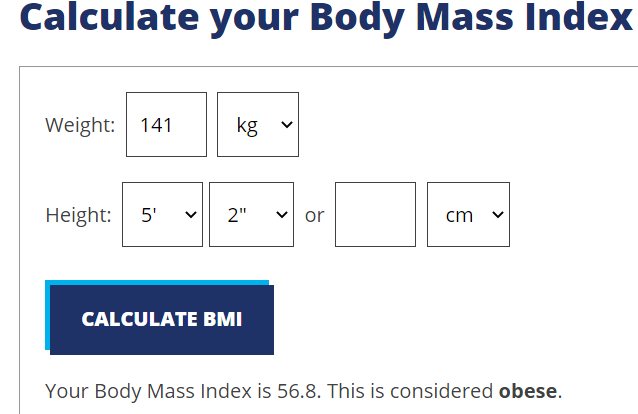

Source: https://www.diabetes.ca/managing-my-diabetes/tools---resources/body-mass-index-(bmi)-calculator#:~:text=How%20to%20calculate%20Body%20Mass,range%20is%2018.5%20to%2024.9.

In [55]:
df[df['heartRate']== 143]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
556,57,F,NO,0.0,0.0,0,0,0,257.0,133.0,94.0,17.71,143.0,75.0,0


### Heart Rate of 143 beats per minute is also a genuine point. Although, in the given dataset the individual has no heart risks. There is a medical condition called 'Supraventricular tachycardia (SVT) where heart rate may be as high as 250 beats per minute, but is usually between 140 and 180.

Source: https://www.nhsinform.scot/illnesses-and-conditions/heart-and-blood-vessels/conditions/supraventricular-tachycardia

In [56]:
df[df['glucose']== 394]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1032,67,F,NO,0.0,1.0,0,1,1,303.0,204.0,96.0,27.86,75.0,394.0,1
1587,62,M,NO,0.0,0.0,0,0,1,346.0,102.5,66.5,17.17,80.0,394.0,1


Both individuals have diabetes

No value is considered as an outlier for further use.

###Smokers Plot

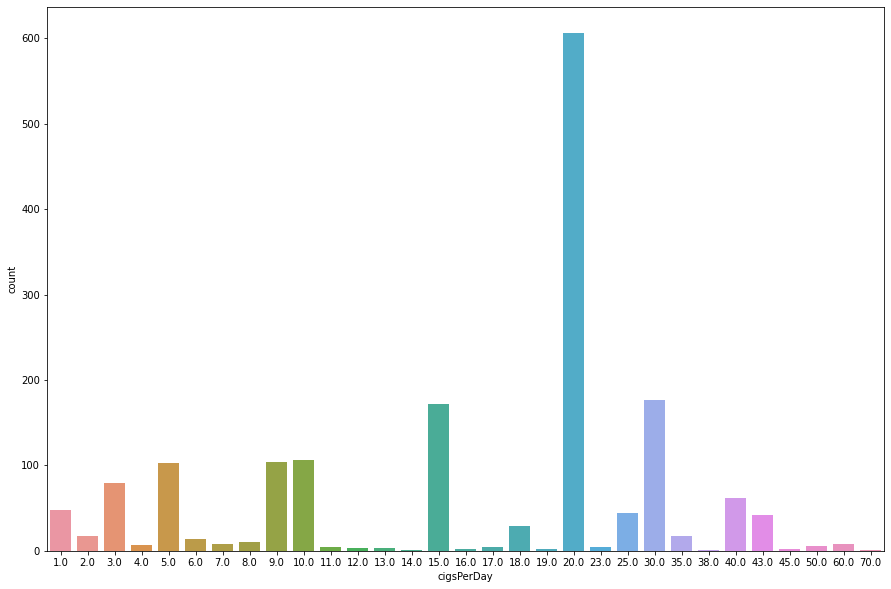

In [57]:
#Make a plot after excluding non-smokers
plt.figure(figsize=(15,10))
sns.countplot(x=df[df['cigsPerDay']!=0.0]['cigsPerDay'])
plt.show()

In [58]:
#Average cigarettes smoked by a smoker every day
print('The average cigarettes smoked by a smoker per day is:',"{:.2f}".format(df[df['cigsPerDay']!=0.0]['cigsPerDay'].sum()/len(df[df['cigsPerDay']!=0.0])))

The average cigarettes smoked by a smoker per day is: 18.34


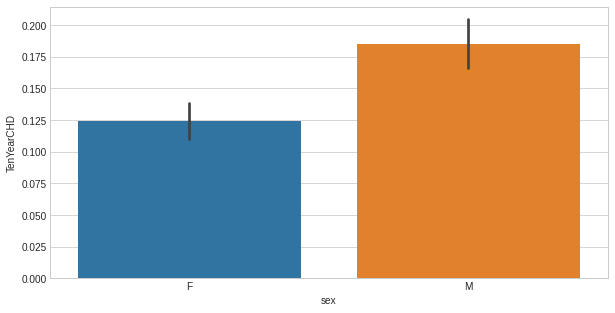

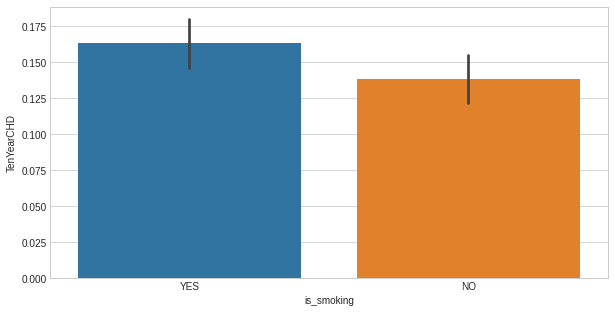

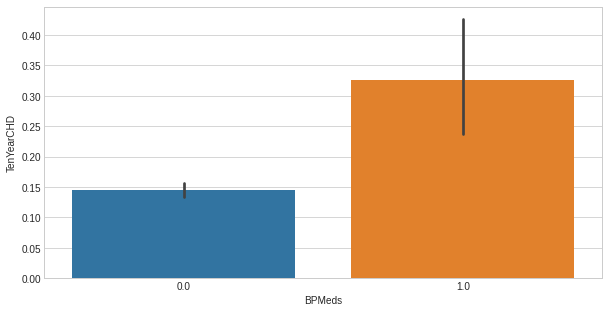

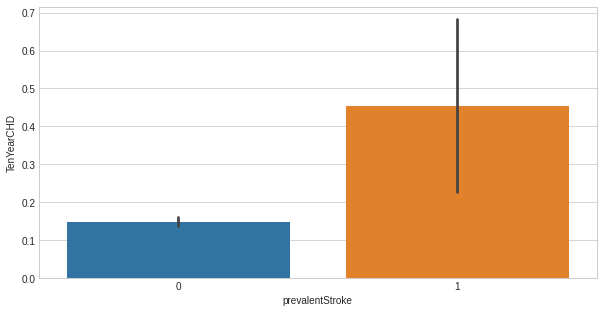

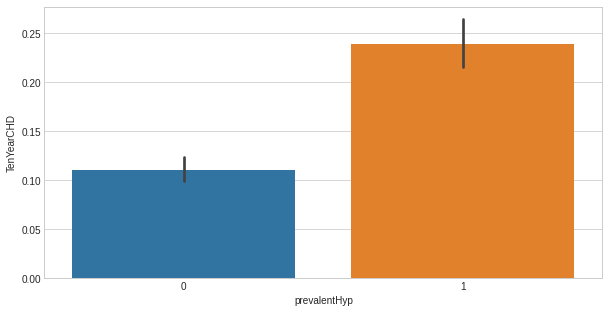

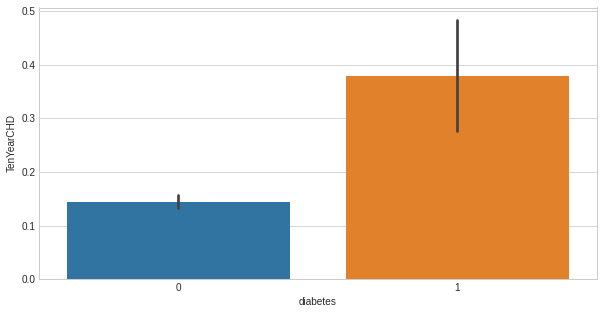

In [59]:
#plotting the categorical variables
for col in categorical_columns[0:-1]:
  plt.figure(figsize=(10,5))
  plt.style.use('seaborn-whitegrid')
  plots = sns.barplot(data=df,x=col,y='TenYearCHD')

###Ploting different graphs to know the cardiovascular disease based in 'Male' and 'Female' category and keeping other conditions same

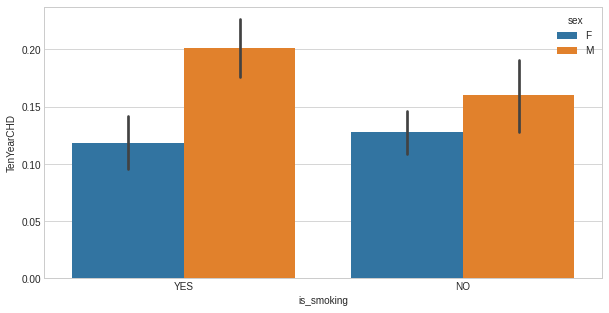

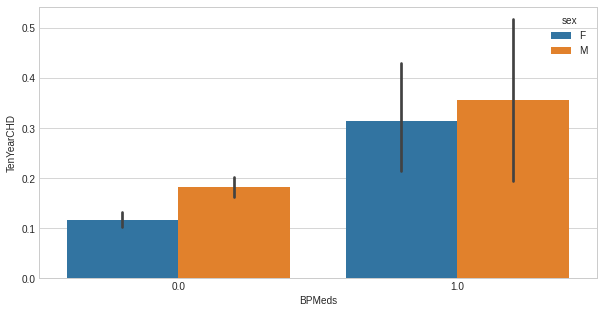

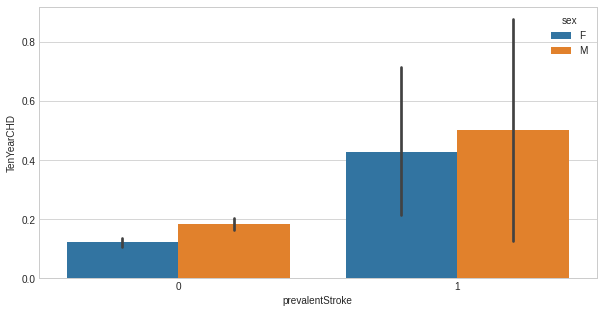

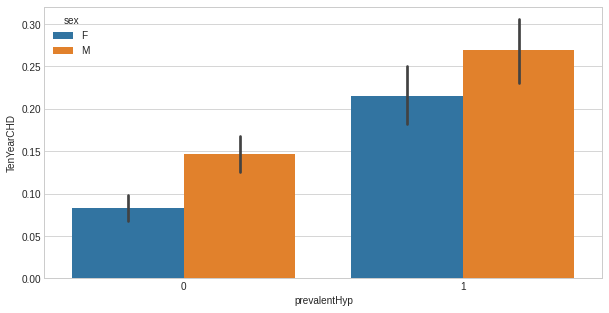

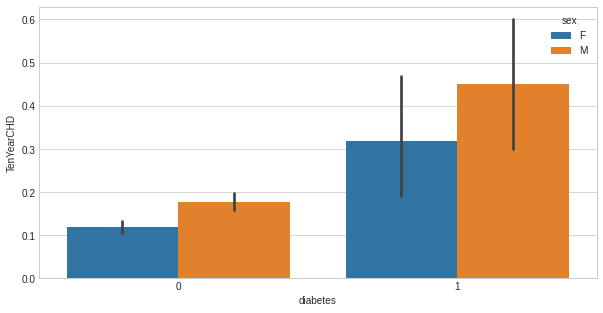

In [60]:
for i in categorical_columns[0:-1]:
  if i!='sex':
    fig,ax=plt.subplots(figsize=(10,5))
    sns.barplot(data=df,x=i,y='TenYearCHD',hue='sex',ax=ax)

In [61]:
df.head(2)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


###Let's compare different individuals and their cardiovascular risk percentage based on different categorical features.

In [62]:
print('Male or Female:')
print("{:.2f}".format(len(df[(df['sex']=='F') & (df['TenYearCHD']==1)])*100/len(df[df['sex']=='F'])),'% Females are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['sex']=='M') & (df['TenYearCHD']==1)])*100/len(df[df['sex']=='M'])),'% Males are at 10-year risk of coronary heart disease(CHD)')

Male or Female:
12.43 % Females are at 10-year risk of coronary heart disease(CHD)
18.54 % Males are at 10-year risk of coronary heart disease(CHD)


In [63]:
print('Smoker or Non-Smoker:')
print("{:.2f}".format(len(df[(df['is_smoking']=='YES') & (df['TenYearCHD']==1)])*100/len(df[df['is_smoking']=='YES'])),'% Smokers are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['is_smoking']=='NO') & (df['TenYearCHD']==1)])*100/len(df[df['is_smoking']=='NO'])),'% Non-Smokersare at 10-year risk of coronary heart disease(CHD)')

Smoker or Non-Smoker:
16.30 % Smokers are at 10-year risk of coronary heart disease(CHD)
13.86 % Non-Smokersare at 10-year risk of coronary heart disease(CHD)


In [64]:
print('On BP Medication or Not on Medication')
print("{:.2f}".format(len(df[(df['BPMeds']==1) & (df['TenYearCHD']==1)])*100/len(df[df['BPMeds']==1])),'% of individuals on BP medication are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['BPMeds']==0) & (df['TenYearCHD']==1)])*100/len(df[df['BPMeds']==0])),'% of individuals not on BP medication are at 10-year risk of coronary heart disease(CHD)')

On BP Medication or Not on Medication
32.67 % of individuals on BP medication are at 10-year risk of coronary heart disease(CHD)
14.53 % of individuals not on BP medication are at 10-year risk of coronary heart disease(CHD)


In [65]:
print('Prevalent Stroke condition or Not')
print("{:.2f}".format(len(df[(df['prevalentStroke']==1) & (df['TenYearCHD']==1)])*100/len(df[df['prevalentStroke']==1])),'% of individuals with prevalent stroke condition are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['prevalentStroke']==0) & (df['TenYearCHD']==1)])*100/len(df[df['prevalentStroke']==0])),'% of individuals with no prevalent stroke condition are at 10-year risk of coronary heart disease(CHD)')

Prevalent Stroke condition or Not
45.45 % of individuals with prevalent stroke condition are at 10-year risk of coronary heart disease(CHD)
14.88 % of individuals with no prevalent stroke condition are at 10-year risk of coronary heart disease(CHD)


In [66]:
print('Prevalent Hypertension or Not')
print("{:.2f}".format(len(df[(df['prevalentHyp']==1) & (df['TenYearCHD']==1)])*100/len(df[df['prevalentHyp']==1])),'% of individuals with prevalent hypertension are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['prevalentHyp']==0) & (df['TenYearCHD']==1)])*100/len(df[df['prevalentHyp']==0])),'% of individuals with no prevalent hypertension are at 10-year risk of coronary heart disease(CHD)')

Prevalent Hypertension or Not
23.85 % of individuals with prevalent hypertension are at 10-year risk of coronary heart disease(CHD)
11.03 % of individuals with no prevalent hypertension are at 10-year risk of coronary heart disease(CHD)


In [67]:
print('Diabetic or Non-diabetic')
print("{:.2f}".format(len(df[(df['diabetes']==1) & (df['TenYearCHD']==1)])*100/len(df[df['diabetes']==1])),'% of diabetic individuals are at 10-year risk of coronary heart disease(CHD)')
print("{:.2f}".format(len(df[(df['diabetes']==0) & (df['TenYearCHD']==1)])*100/len(df[df['diabetes']==0])),'% of non-diabetic individuals are at 10-year risk of coronary heart disease(CHD)')

Diabetic or Non-diabetic
37.93 % of diabetic individuals are at 10-year risk of coronary heart disease(CHD)
14.47 % of non-diabetic individuals are at 10-year risk of coronary heart disease(CHD)


Creating a dataframe (table) to show the ratio of the individuals at cardiovascular risk with those who are not at risk based on the age groups.

In [68]:
a = sum(df['age']<=40)
b = sum((df['age']>40) & (df['age']<=50))
c = sum((df['age']>50) & (df['age']<=60))
d = sum((df['age']>60) & (df['age']<=70))

In [69]:
df_noCHD = df[df['TenYearCHD']==0]
df_yesCDH = df[df['TenYearCHD']==1]

In [70]:
aN = sum(df_noCHD['age']<=40)
bN = sum((df_noCHD['age']>40) & (df_noCHD['age']<=50))
cN = sum((df_noCHD['age']>50) & (df_noCHD['age']<=60))
dN = sum((df_noCHD['age']>60) & (df_noCHD['age']<=70))

In [71]:
aY = sum(df_yesCDH['age']<=40)
bY = sum((df_yesCDH['age']>40) & (df_yesCDH['age']<=50))
cY = sum((df_yesCDH['age']>50) & (df_yesCDH['age']<=60))
dY = sum((df_yesCDH['age']>60) & (df_yesCDH['age']<=70))

In [72]:
#creating an age band to know which age group has the highest risk of attack 
data  = {'age_group':['31-40', '41-50', '51-60', '61-70'], 
         'total_individuals': [a, b, c, d],
         'no_chd_total': [aN, bN, cN, dN],
         'yes_chd_total':[aY, bY, cY, dY],
         'risk_VS_noRisk_ratio':[aY/aN, bY/bN, cY/cN, dY/dN]}
age_df = pd.DataFrame(data)

In [73]:
age_df

,age_group,total_individuals,no_chd_total,yes_chd_total,risk_VS_noRisk_ratio
0,31-40,604,574,30,0.052265
1,41-50,1283,1144,139,0.121503
2,51-60,1041,834,207,0.248201
3,61-70,462,327,135,0.412844


The risk of heart disease is nearly doubling after every 10 years.

In [74]:
df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

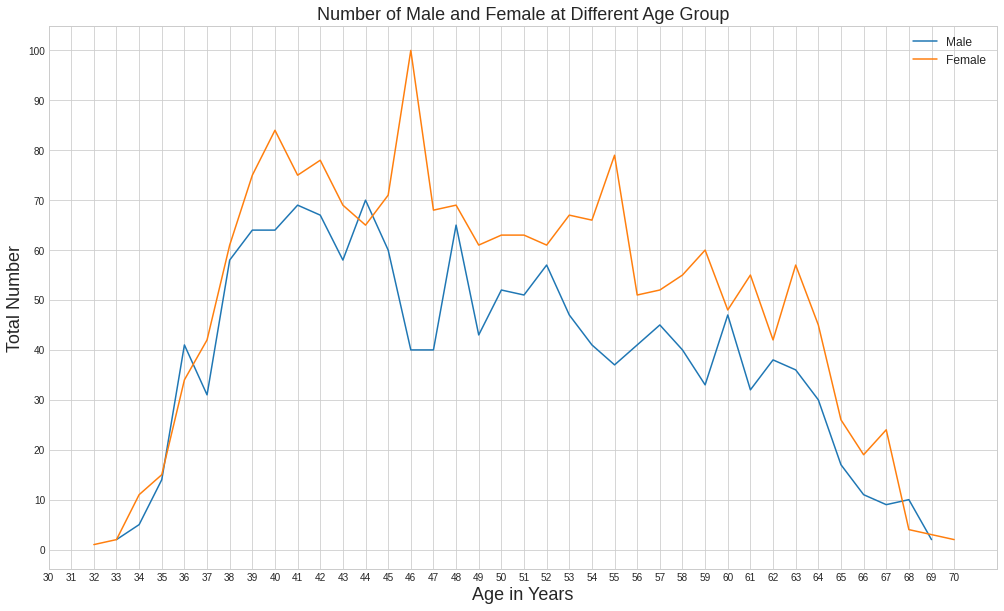

In [77]:
#line graph to show the number of 'male' and 'female' in the dataframe at different age. 
plt.figure(figsize=(17,10))
plt.plot(df[df['sex']=='M']['age'].value_counts().sort_index())
plt.plot(df[df['sex']=='F']['age'].value_counts().sort_index())
plt.legend(['Male','Female'],fontsize=12)
plt.title("Number of Male and Female at Different Age Group",fontsize=18)
plt.xlabel('Age in Years',fontsize=18)
plt.ylabel('Total Number',fontsize=18)
plt.xticks(np.arange(30,71,1))
plt.yticks(np.arange(0,110,10))
plt.show()

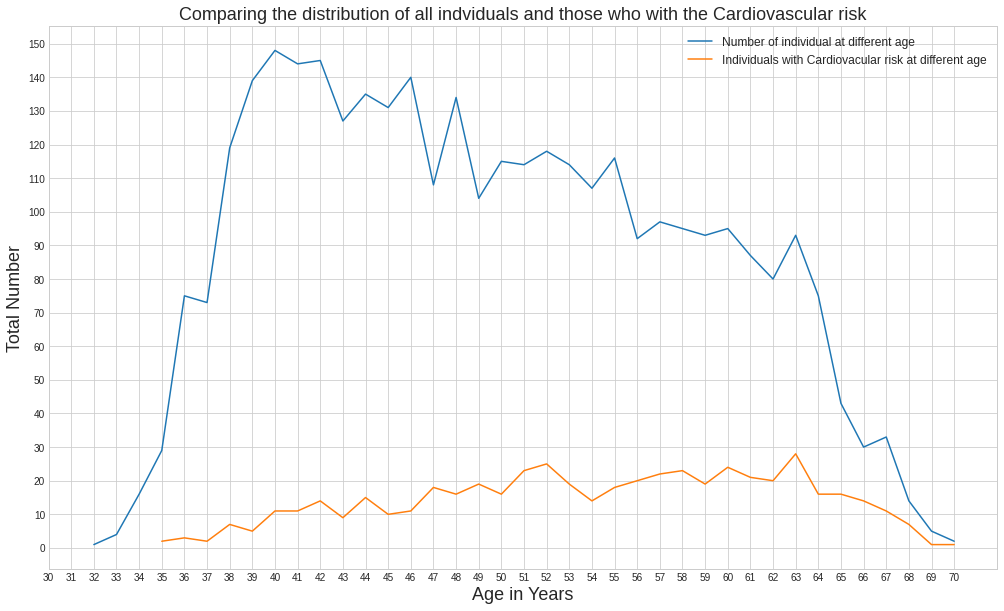

In [80]:
#Comparing the age of individuals with the age of those who with the Cardiovascular risk
plt.figure(figsize=(17,10))
plt.plot(df['age'].value_counts().sort_index())
plt.plot(df[df['TenYearCHD']==1]['age'].value_counts().sort_index())
plt.legend(['Number of individual at different age','Individuals with Cardiovacular risk at different age'],fontsize=12)
plt.title("Comparing the distribution of all indviduals and those who with the Cardiovascular risk",fontsize=18)
plt.xlabel('Age in Years',fontsize=18)
plt.ylabel('Total Number',fontsize=18)
plt.xticks(np.arange(30,71,1))
plt.yticks(np.arange(0,160,10))
plt.show()

###Let's explore the 'glucose' & 'diabetes' features.

In [81]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

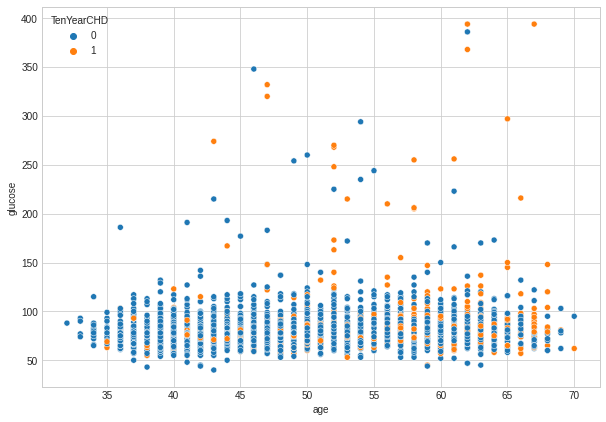

In [82]:
#Scatter Plot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='glucose', hue='TenYearCHD', data=df)
plt.show()

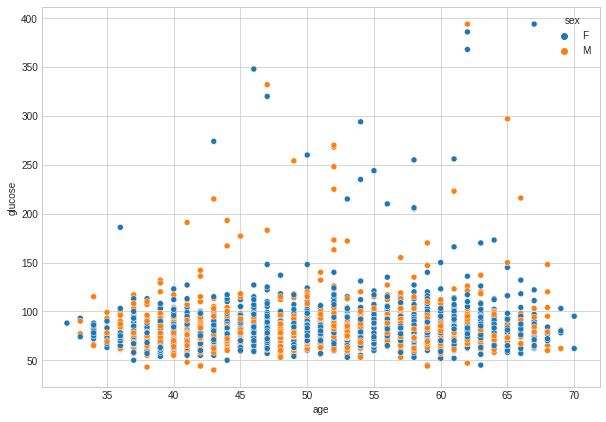

In [83]:
#Scatter Plot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='glucose', hue='sex', data=df)
plt.show()

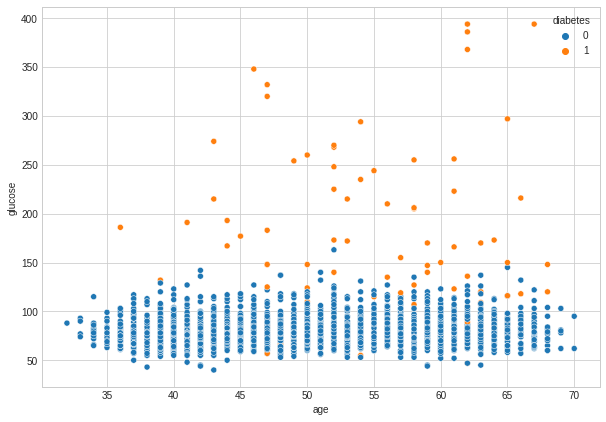

In [84]:
#Scatter Plot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='glucose', hue='diabetes', data=df)
plt.show()

###Exploring the 'heartRate' feature

In [85]:
df['heartRate'].value_counts().sort_index()

45.0      1
47.0      1
48.0      4
50.0     15
51.0      1
         ..
120.0     5
122.0     2
125.0     3
140.0     1
143.0     1
Name: heartRate, Length: 68, dtype: int64

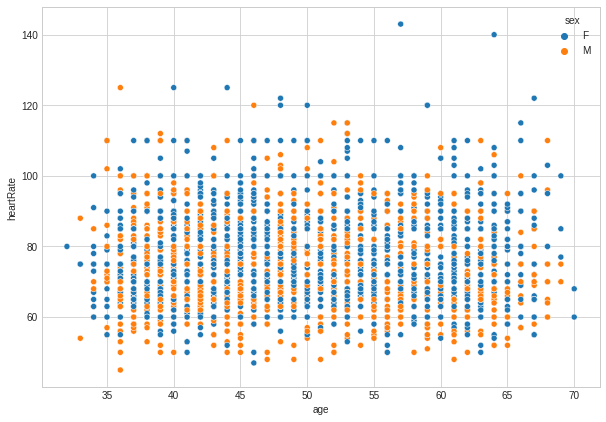

In [86]:
#Scatter Plot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='heartRate', hue='sex', data=df)
plt.show()

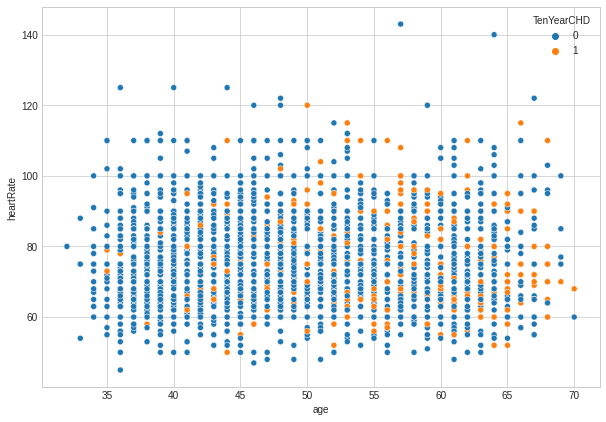

In [87]:
#Scatter Plot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=df)
plt.show()

###Exploring 'BMI'

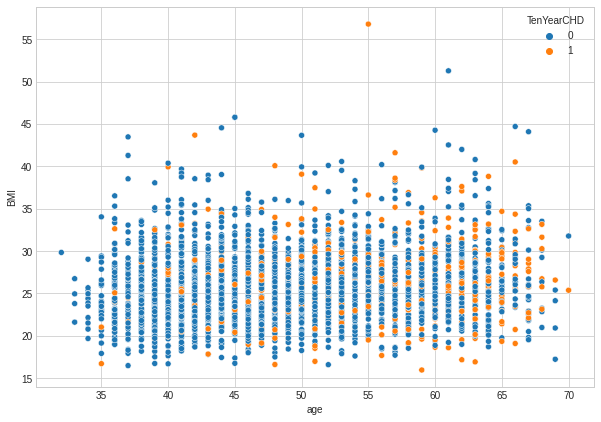

In [88]:
#scatterplot
plt.figure(figsize=(10,7))
g=sns.scatterplot(x='age', y='BMI', hue='TenYearCHD', data=df)
plt.show()

Encoding 'sex' and 'is_smoking' features

In [89]:
# Defining a label encoder
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df = df.replace(encoder)

In [90]:
df_copy = df.copy()
df_copy

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [91]:
df_copy.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

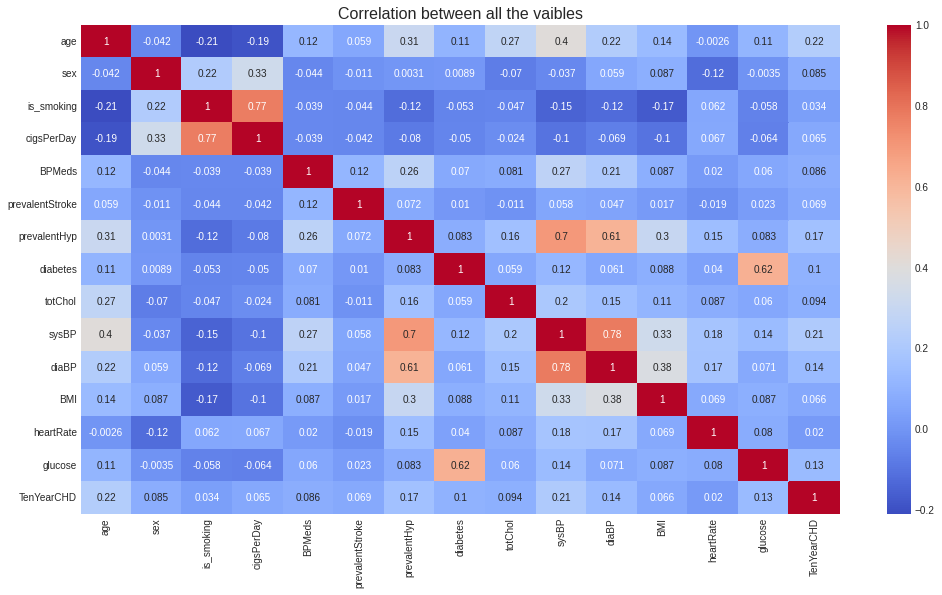

In [92]:
#Heatmap for co-relation in features
plt.figure(figsize=(17, 9))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [93]:
#Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [94]:
calc_vif(df[[i for i in df_copy.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,41.166374
1,sex,2.125002
2,is_smoking,5.010451
3,cigsPerDay,4.307665
4,BPMeds,1.135443
5,prevalentStroke,1.026456
6,prevalentHyp,2.385181
7,diabetes,1.614327
8,totChol,30.496645
9,sysBP,134.837061


In [95]:
#dropping few columns
df_copy = df_copy.drop(columns=['sysBP','diaBP','BMI'])

In [96]:
calc_vif(df[[i for i in df_copy.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,31.862278
1,sex,1.993600
2,is_smoking,4.990304
3,cigsPerDay,4.303949
4,BPMeds,1.124110
5,prevalentStroke,1.026282
6,prevalentHyp,1.693760
7,diabetes,1.571696
8,totChol,28.192484
9,heartRate,29.205500


In [97]:
#dropping few columns
df_copy = df_copy.drop(columns=['totChol','heartRate','glucose'])

In [98]:
calc_vif(df[[i for i in df_copy.describe().columns if i not in ['TenYearCHD']]])

,variables,VIF
0,age,3.013568
1,sex,1.977764
2,is_smoking,4.863869
3,cigsPerDay,4.275271
4,BPMeds,1.121433
5,prevalentStroke,1.024053
6,prevalentHyp,1.683564
7,diabetes,1.042240


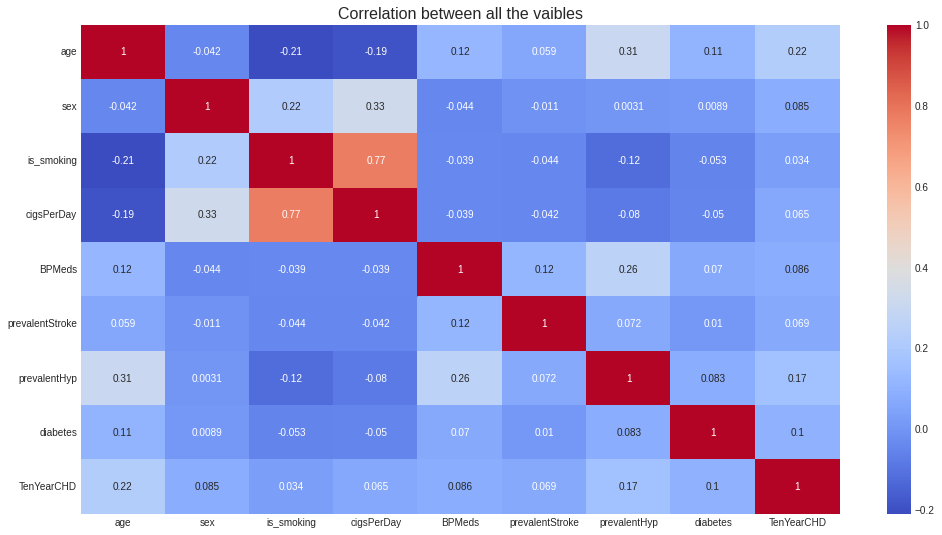

In [99]:
#Heatmap for co-relation in features
plt.figure(figsize=(17, 9))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [100]:
#dropping 'is_smoking' column
df_copy.drop(columns='is_smoking', inplace=True)

In [101]:
df_copy

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,64,0,3.0,0.0,0,0,0,1
1,36,1,0.0,0.0,0,1,0,0
2,46,0,10.0,0.0,0,0,0,0
3,50,1,20.0,0.0,0,1,0,1
4,64,0,30.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
3385,60,0,0.0,0.0,0,0,0,0
3386,46,0,0.0,0.0,0,0,0,0
3387,44,1,3.0,0.0,0,1,0,1
3388,60,1,0.0,0.0,0,1,0,0


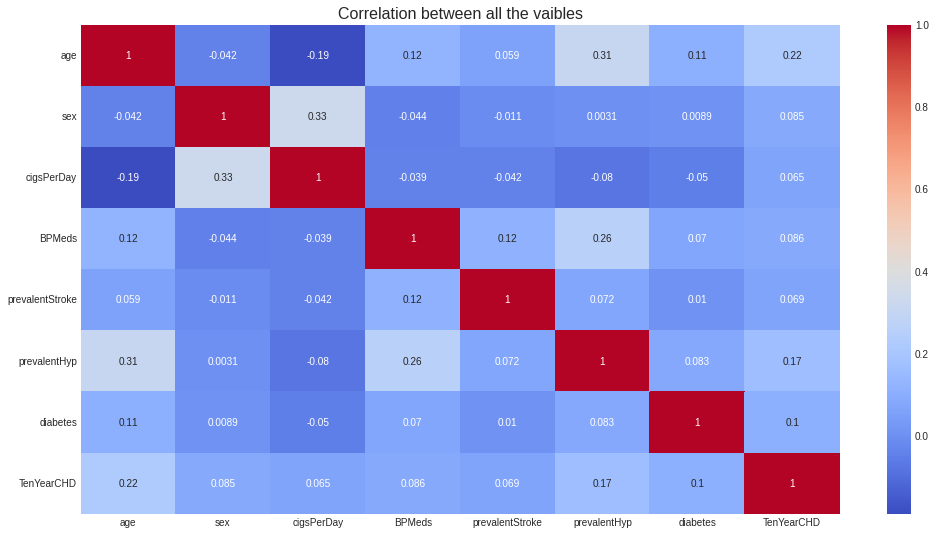

In [102]:
#Heatmap for co-relation in features
plt.figure(figsize=(17, 9))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

##Model Building

In [103]:
# Data for all the independent variables
X = df_copy.drop(labels='TenYearCHD',axis=1)

# Data for the dependent variable
y = df_copy['TenYearCHD']

In [104]:
X.shape, y.shape

((3390, 7), (3390,))

In [122]:
# Train-test split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=1)

In [123]:
# Check the shape of train dataset
print(x_train.shape,y_train.shape)

# Check the shape of test dataset
print(x_test.shape, y_test.shape)

(2542, 7) (2542,)
(848, 7) (848,)


##1. Logistic Regression Classifier

In [124]:

from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) 
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       721
           1       0.86      0.05      0.09       127

    accuracy                           0.86       848
   macro avg       0.86      0.52      0.51       848
weighted avg       0.86      0.86      0.80       848



In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.8561320754716981

In [127]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

Minimum error:- 0.14858490566037735 at K = 24


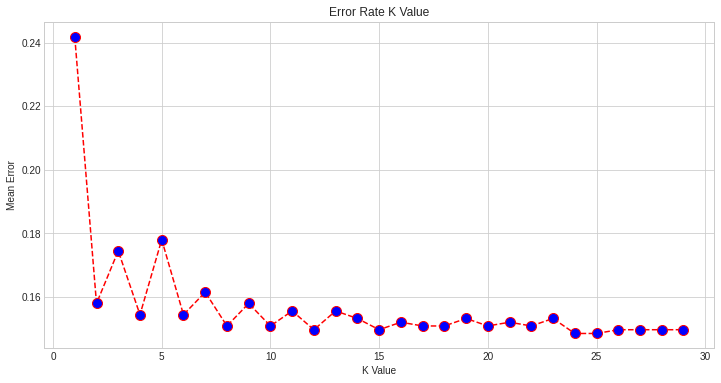

In [128]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [129]:
classifier= KNeighborsClassifier(n_neighbors=24)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=24)

In [130]:
y_pred= classifier.predict(x_test)  

In [131]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [132]:
cm

array([[721,   0],
       [126,   1]])

In [133]:
accuracy_score(y_test, y_pred)

0.8514150943396226

##2. K-NN (K-Nearest Neighbour) Classifier

In [108]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
model2.fit(x_train, y_train) 

y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       581
           1       0.32      0.09      0.14        97

    accuracy                           0.84       678
   macro avg       0.59      0.53      0.53       678
weighted avg       0.79      0.84      0.80       678



In [109]:
#Random Forest
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       581
           1       0.37      0.19      0.25        97

    accuracy                           0.84       678
   macro avg       0.62      0.57      0.58       678
weighted avg       0.80      0.84      0.81       678



##Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 

In [111]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [112]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [114]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.3s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [115]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=40, min_samples_split=150,
                       n_estimators=80)

In [116]:
rf_optimal_model = rf_grid.best_estimator_

In [117]:
rf_grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 150,
 'n_estimators': 80}

In [ ]:
#Random Forest
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

In [120]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(x_train)
test_class_preds = rf_optimal_model.predict(x_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(x_train)[:,1]
test_preds = rf_optimal_model.predict_proba(x_test)[:,1]

In [121]:
print(classification_report(y_test, test_class_preds)) # output accuracy

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       581
           1       0.00      0.00      0.00        97

    accuracy                           0.86       678
   macro avg       0.43      0.50      0.46       678
weighted avg       0.73      0.86      0.79       678



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
len(train_preds)

2542

In [ ]:
test_class_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8489378442171518
The accuracy on test dataset is 0.8502358490566038


In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds )

In [ ]:
train_cm

array([[2158,    0],
       [ 384,    0]])

In [ ]:
test_cm

array([[721,   0],
       [127,   0]])

In [ ]:
score.mean()